In [25]:
# Start writing code here...

import numpy as np
import pandas as pd

well_log = pd.read_csv('/work/Carpe-Datum-2022/Well_Log/WELL_MASTER.csv')

well_log = well_log.replace({'Upper':1,'Lower':0})

well_log.describe().T



,count,mean,std,min,25%,50%,75%,max
MD(ft),1963.0,4673.224657,165.718326,4228.005683,4546.547858,4666.802978,4796.413228,5096.702794
PORO(v/v),455.0,0.131140,0.062887,0.019566,0.072468,0.129662,0.185373,0.249241
Permeability(mD),221.0,10.497034,39.248645,0.000001,0.019500,0.094813,1.948104,352.697773
RHOB(g/cm3),1918.0,2.472862,0.207148,1.991035,2.326909,2.469486,2.578890,3.044163
DTS(us/ft),1004.0,128.273096,35.222315,-471.675434,116.813090,131.851152,142.295954,186.253964
DT(us/ft),1920.0,80.322722,17.827921,1.138524,69.493418,78.929504,87.863830,179.133001
PEF(B/E),1689.0,5.351575,2.475290,0.019155,4.930555,5.782597,6.477832,11.490936
RD(OHMM),1724.0,181.844254,184.443838,10.197411,70.345749,130.884864,213.021581,2508.770579
RS(OHMM),1724.0,514.513168,3246.082233,2.270108,71.606283,137.398654,259.946834,62290.800000
ROP,1726.0,20.167304,28.413135,-490.300267,16.815940,20.011714,27.341557,46.895400


In [26]:
#estimate the zone of where missing

missing_zone = well_log.Zone.isnull()

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)

knn_model.fit(well_log.loc[~missing_zone,['X','Y','MD(ft)']], well_log.loc[~missing_zone, 'Zone'])


test = knn_model.predict(well_log.loc[missing_zone,['X','Y','MD(ft)']])
well_log.loc[missing_zone, 'Zone'] = knn_model.predict(well_log.loc[missing_zone,['X','Y','MD(ft)']])

well_log.describe().T


,count,mean,std,min,25%,50%,75%,max
MD(ft),1963.0,4673.224657,165.718326,4228.005683,4546.547858,4666.802978,4796.413228,5096.702794
PORO(v/v),455.0,0.131140,0.062887,0.019566,0.072468,0.129662,0.185373,0.249241
Permeability(mD),221.0,10.497034,39.248645,0.000001,0.019500,0.094813,1.948104,352.697773
RHOB(g/cm3),1918.0,2.472862,0.207148,1.991035,2.326909,2.469486,2.578890,3.044163
DTS(us/ft),1004.0,128.273096,35.222315,-471.675434,116.813090,131.851152,142.295954,186.253964
DT(us/ft),1920.0,80.322722,17.827921,1.138524,69.493418,78.929504,87.863830,179.133001
PEF(B/E),1689.0,5.351575,2.475290,0.019155,4.930555,5.782597,6.477832,11.490936
RD(OHMM),1724.0,181.844254,184.443838,10.197411,70.345749,130.884864,213.021581,2508.770579
RS(OHMM),1724.0,514.513168,3246.082233,2.270108,71.606283,137.398654,259.946834,62290.800000
ROP,1726.0,20.167304,28.413135,-490.300267,16.815940,20.011714,27.341557,46.895400


In [27]:
#estimate the missing variables of where missing

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=1)
from sklearn.model_selection import GridSearchCV, KFold

def knn_imp(well_log, replace_var = 'DT(us/ft)', predictors = ['X','Y','MD(ft)']):
    
    parameters = {'weights': ('uniform', 'distance'), 
              'n_neighbors':[4, 6, 8, 10]}

    knn = KNeighborsRegressor()
    gcv = GridSearchCV(knn, parameters, cv=KFold(random_state=2, shuffle=True))
    
    missing_Var = well_log[replace_var].isnull()

    gcv.fit(well_log.loc[~missing_Var,predictors], well_log.loc[~missing_Var, replace_var])


    #test = gcv.predict(well_log.loc[missing_Var,predictors])
    well_log.loc[missing_Var, replace_var] = gcv.predict(well_log.loc[missing_Var,predictors])

    return well_log


well_log = knn_imp(well_log, 'DT(us/ft)')
well_log = knn_imp(well_log, 'RHOB(g/cm3)')
well_log = knn_imp(well_log, 'ROP')
well_log = knn_imp(well_log, 'RD(OHMM)')
well_log = knn_imp(well_log, 'RS(OHMM)')
well_log = knn_imp(well_log, 'PEF(B/E)')
well_log = knn_imp(well_log, 'DENC(g/cm3)')

    

In [29]:
well_log.describe().T

,count,mean,std,min,25%,50%,75%,max
MD(ft),1963.0,4673.224657,165.718326,4228.005683,4546.547858,4666.802978,4796.413228,5096.702794
PORO(v/v),455.0,0.131140,0.062887,0.019566,0.072468,0.129662,0.185373,0.249241
Permeability(mD),221.0,10.497034,39.248645,0.000001,0.019500,0.094813,1.948104,352.697773
RHOB(g/cm3),1918.0,2.472862,0.207148,1.991035,2.326909,2.469486,2.578890,3.044163
DTS(us/ft),1004.0,128.273096,35.222315,-471.675434,116.813090,131.851152,142.295954,186.253964
DT(us/ft),1963.0,80.290026,17.668513,1.138524,69.583404,79.192870,87.540243,179.133001
PEF(B/E),1689.0,5.351575,2.475290,0.019155,4.930555,5.782597,6.477832,11.490936
RD(OHMM),1724.0,181.844254,184.443838,10.197411,70.345749,130.884864,213.021581,2508.770579
RS(OHMM),1724.0,514.513168,3246.082233,2.270108,71.606283,137.398654,259.946834,62290.800000
ROP,1726.0,20.167304,28.413135,-490.300267,16.815940,20.011714,27.341557,46.895400


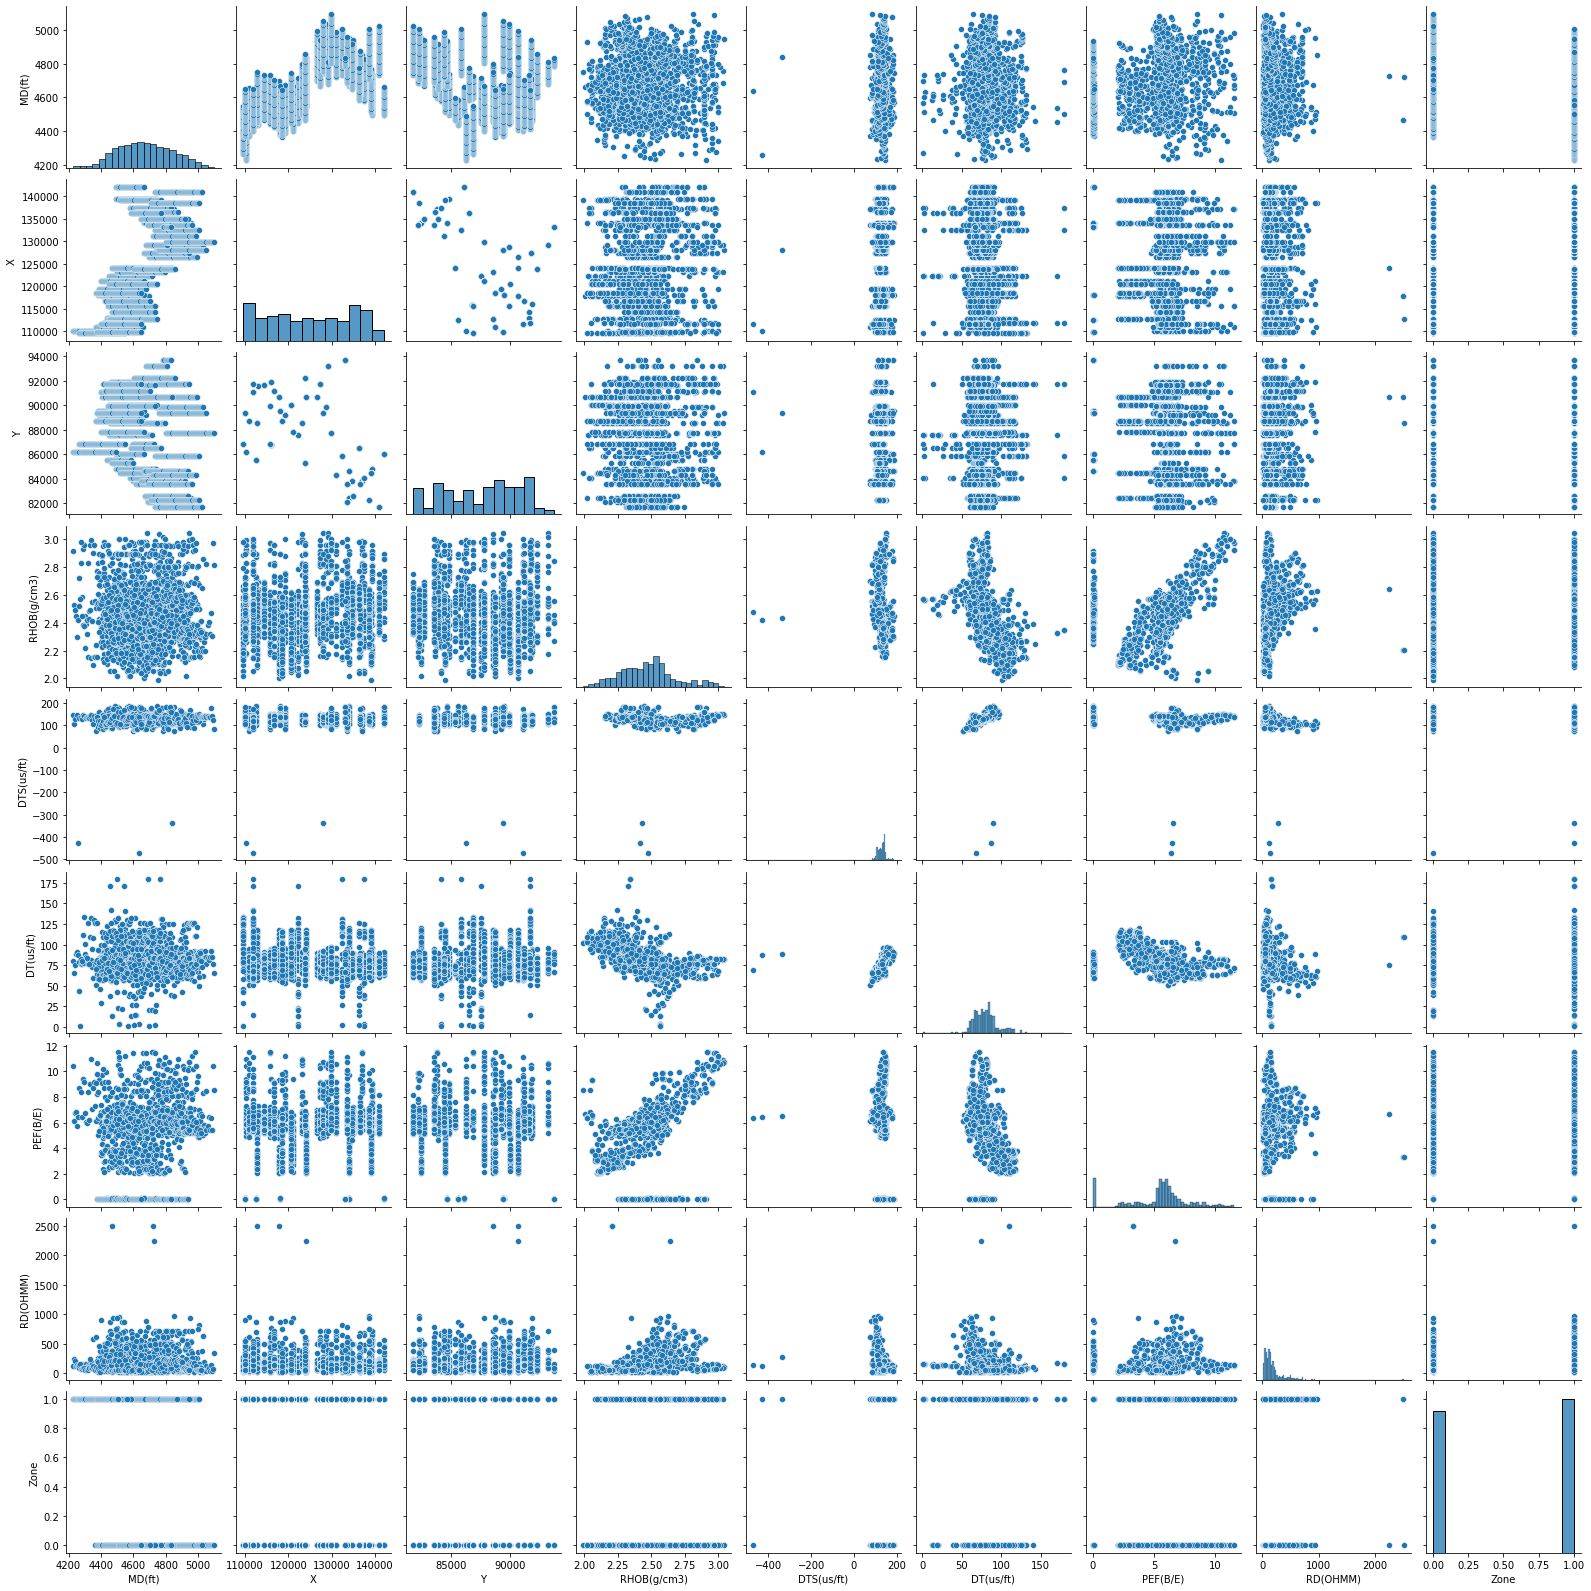

In [ ]:
import seaborn as sns

sns.pairplot(well_log,vars=['MD(ft)','X','Y','RHOB(g/cm3)','DTS(us/ft)',
       'DT(us/ft)', 'PEF(B/E)', 'RD(OHMM)', 'Zone'],markers='o')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b71fecc-b405-4b93-bce3-c5ed6c21c449' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>